# XGBoost
In this notebook, we implemented and evaluated an XGBoost model to predict auto loan default (bad_flag).

In [50]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from preprocessing import load_data, preprocess_data
from model_evaluation import evaluate_models, tune_hyperparameters, feature_importance, threshold_analysis, cross_val_pr_curve, cross_val_roc_curve
import xgboost as xgb
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


## Load & Preprocess Data

In [51]:
train_path = "/Users/heba/Desktop/Erdos/Training Dataset A_R-384891_Candidate Attach #1_PresSE_SRF #1142.csv"
eval_path = "/Users/heba/Desktop/Erdos/Evaluation Dataset B_R-384891_Candidate Attach #2_PresSE_SRF #1142.csv"

df_train, df_eval = load_data(train_path, eval_path)
X_train_processed, y_train, X_eval_processed, y_eval, to_drop_corr, cols_to_drop, preprocessor = preprocess_data(df_train, df_eval)

print("Train shape:", X_train_processed.shape)
print("Eval shape:", X_eval_processed.shape)

Train shape: (21348, 28)
Eval shape: (5336, 28)


## XGBoost

In [52]:
# Compute class weight manually
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos


In [53]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}


In [54]:
grid = GridSearchCV(xgb, param_grid, scoring='average_precision', cv=3, n_jobs=-1, verbose=1)
grid.fit(X_train_df, y_train)

print("Best Params:", grid.best_params_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:12:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:12:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:12:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:12:33] WARNING: /Users/runner/work/xgboost/xgboost/src/lear

Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.8}


/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:12:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:12:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:12:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CV Scores: [0.98171642 0.98265787 0.97571297]
Mean CV Score: 0.9800290864418709


/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:12:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:12:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:12:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:               precision    recall  f1-score   support

           0       0.12      0.66      0.20       958
           1       0.98      0.77      0.86     20390

    accuracy                           0.77     21348
   macro avg       0.55      0.72      0.53     21348
weighted avg       0.94      0.77      0.84     21348



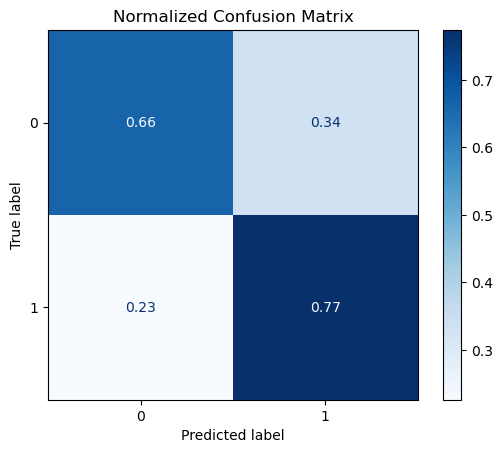

/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:12:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:12:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:12:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:12:42] WARNING: /Users/runner/work/xgboost/xgboost/src/lear

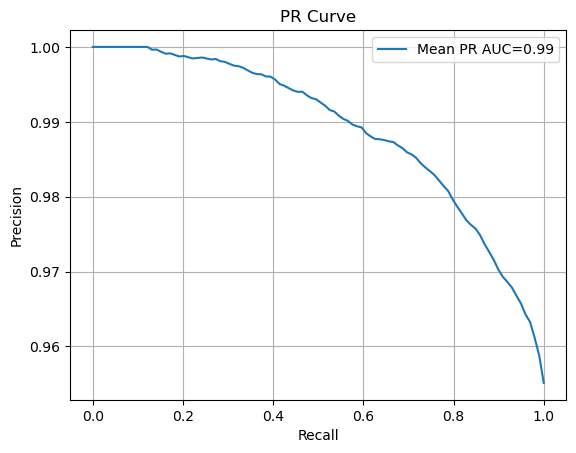

Mean PR AUC: 0.9890


/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:12:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:12:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:12:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:12:46] WARNING: /Users/runner/work/xgboost/xgboost/src/lear

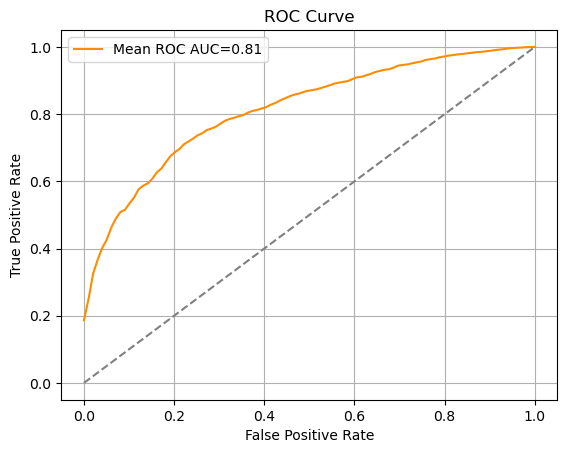

Mean ROC AUC: 0.8145


,precision,recall,f1-score,support
0,0.121189,0.663883,0.204963,958.000000
1,0.980000,0.773811,0.864785,20390.000000
accuracy,0.768878,0.768878,0.768878,0.768878
macro avg,0.550595,0.718847,0.534874,21348.000000
weighted avg,0.941461,0.768878,0.835175,21348.000000


In [55]:
xgb_best = grid.best_estimator_
evaluate_models(xgb_best, X_train_df, y_train)


In [56]:
# On test set
X_test_df = pd.DataFrame(X_eval_processed, columns=preprocessor.get_feature_names_out())
y_pred_test = xgb_best.predict(X_test_df)
print("=== Final Test Set Evaluation ===")
print(classification_report(y_eval, y_pred_test))

=== Final Test Set Evaluation ===
              precision    recall  f1-score   support

           0       0.12      0.66      0.20       242
           1       0.98      0.77      0.86      5094

    accuracy                           0.76      5336
   macro avg       0.55      0.71      0.53      5336
weighted avg       0.94      0.76      0.83      5336



# Interpretability

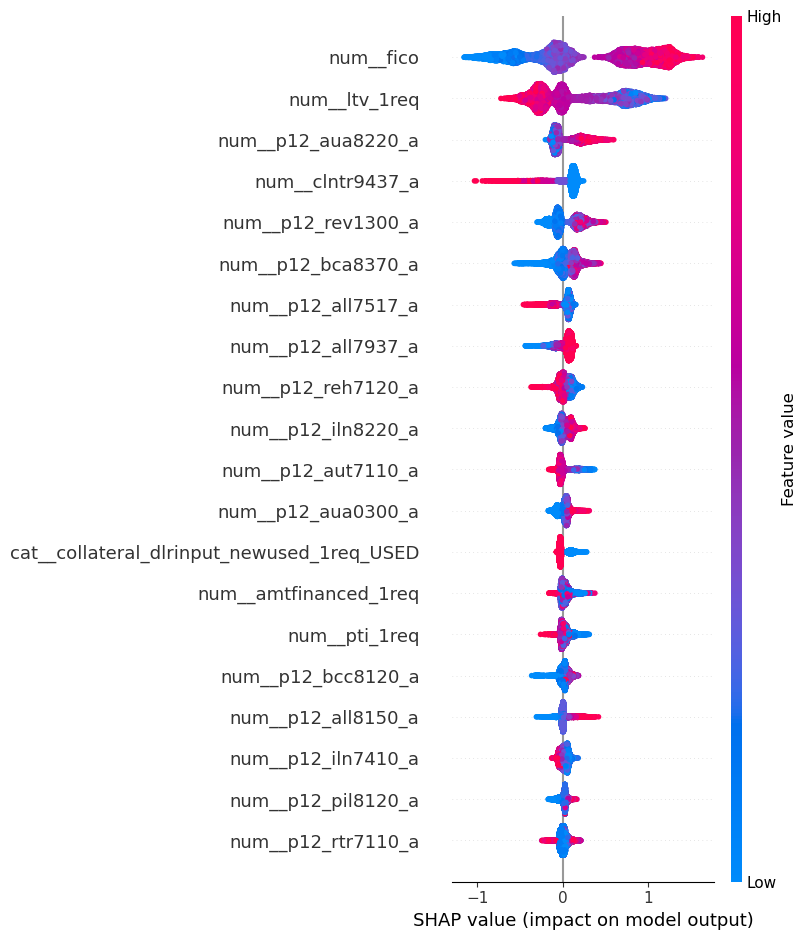

In [57]:
import shap

explainer = shap.TreeExplainer(xgb_best)
shap_values = explainer.shap_values(X_train_df)
shap.summary_plot(shap_values, X_train_df)


# Fairness

In [58]:
import pandas as pd
from sklearn.metrics import confusion_matrix

df_eval_raw = pd.read_csv(eval_path)
sensitive_df = df_eval_raw[['Gender', 'Race']].reset_index(drop=True)

#Align the number of rows (just in case)
sensitive_df = sensitive_df.iloc[:X_test_df.shape[0]].reset_index(drop=True)
y_eval = y_eval.reset_index(drop=True)

# Predict on test set
y_pred_test = xgb_best.predict(X_test_df)

# Combine predictions, true labels, and sensitive features
results_df = pd.DataFrame({
    'true': y_eval,
    'pred': y_pred_test
}).reset_index(drop=True)
results_df = pd.concat([results_df, sensitive_df], axis=1)

# Function to compute TPR per group
def compute_group_tpr(results, group_col):
    tpr_by_group = {}
    for group in results[group_col].unique():
        group_data = results[results[group_col] == group]
        cm = confusion_matrix(group_data['true'], group_data['pred'])
        tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, cm[1, 1])
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
        tpr_by_group[group] = round(tpr, 4)
    return tpr_by_group

# Gender fairness
gender_tpr = compute_group_tpr(results_df, 'Gender')
print("True Positive Rate by Gender:", gender_tpr)

# Race fairness
race_tpr = compute_group_tpr(results_df, 'Race')
print("True Positive Rate by Race:", race_tpr)

# Compute Equal Opportunity Difference (EOD)
def compute_eod(tpr_dict):
    tprs = list(tpr_dict.values())
    return round(max(tprs) - min(tprs), 4)

print("Equal Opportunity Difference (Gender):", compute_eod(gender_tpr))
print("Equal Opportunity Difference (Race):", compute_eod(race_tpr))


True Positive Rate by Gender: {'Undefined': np.float64(0.7714), 'Female': np.float64(0.7678), 'Male': np.float64(0.7685)}
True Positive Rate by Race: {'White': np.float64(0.7662), 'Hispanic': np.float64(0.7589), 'Black': np.float64(0.7657), 'Other': np.float64(0.8069), 'Asian': np.float64(0.8092)}
Equal Opportunity Difference (Gender): 0.0036
Equal Opportunity Difference (Race): 0.0503


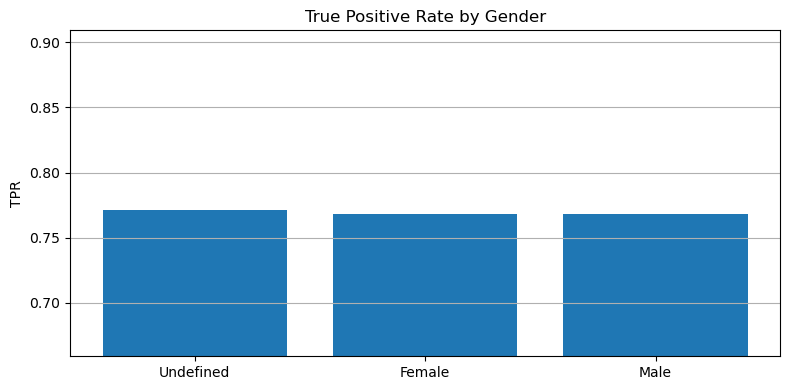

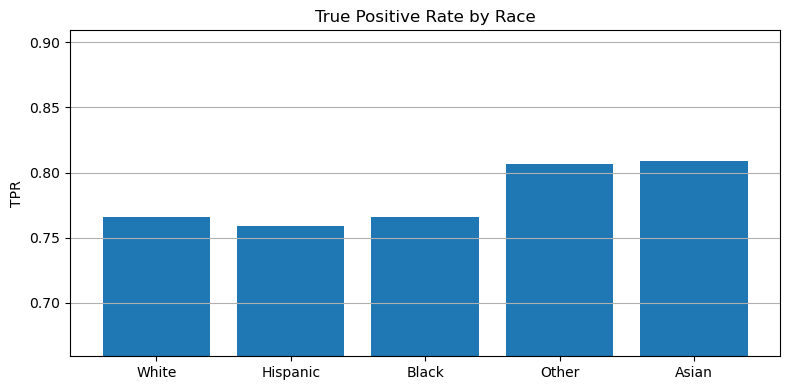

In [59]:
# TPR values from earlier
gender_tpr = {'Undefined': 0.7714, 'Female': 0.7678, 'Male': 0.7685}
race_tpr = {'White': 0.7662, 'Hispanic': 0.7589, 'Black': 0.7657, 'Other': 0.8069, 'Asian': 0.8092}

# Convert to DataFrames
gender_df = pd.DataFrame(list(gender_tpr.items()), columns=['Gender', 'TPR'])
race_df = pd.DataFrame(list(race_tpr.items()), columns=['Race', 'TPR'])

# Adjust the ylim so that the height difference looks smaller and all bars are visually similar
ylim_low = min(min(gender_tpr.values()), min(race_tpr.values())) - 0.10
ylim_high = max(max(gender_tpr.values()), max(race_tpr.values())) + 0.10

# Gender plot
plt.figure(figsize=(8, 4))
plt.bar(gender_df['Gender'], gender_df['TPR'])
plt.title("True Positive Rate by Gender")
plt.ylabel("TPR")
plt.ylim(ylim_low, ylim_high)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Race plot
plt.figure(figsize=(8, 4))
plt.bar(race_df['Race'], race_df['TPR'])
plt.title("True Positive Rate by Race")
plt.ylabel("TPR")
plt.ylim(ylim_low, ylim_high)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [60]:
def compute_disparate_impact(tpr_dict):
    min_tpr = min(tpr_dict.values())
    max_tpr = max(tpr_dict.values())
    disparate_impact = round(min_tpr / max_tpr, 4) if max_tpr > 0 else 0
    return disparate_impact

# Example TPRs by Gender
tpr_gender = {
    'Undefined': 0.7714,
    'Female': 0.7678,
    'Male': 0.7685
}

# Calculate Disparate Impact
di_gender = compute_disparate_impact(tpr_gender)
print("Disparate Impact (Gender):", di_gender)


Disparate Impact (Gender): 0.9953


#### This is very close to 1, which suggests there is no significant disparate impact by gender in terms of true positive rate in the model.

In [62]:
# TPRs by Race
tpr_race = {
    'White': 0.7662,
    'Hispanic': 0.7589,
    'Black': 0.7657,
    'Other': 0.8069,
    'Asian': 0.8092
}
# Calculate for Race
di_race = compute_disparate_impact(tpr_race)
print("Disparate Impact (Race):", di_race)

Disparate Impact (Race): 0.9378


#### The least advantaged racial group receives true positive outcomes 93.8% as often as the most advantaged group.This relatively fair but not perfect